# Ennoncés 

1) Problem 1
Study the python code template_CNN.py where a Convolutional Neural Network is used to predict if an image is a cat or a dog.
2) Problem 2
Apply the CNN to predict the labels of the images in dataset/single_prediction.
3) Problem 3
Study the python code template_RNN.py where a LSTM recurrent neural network is used to predict the stock value of Google.
4) Problem 4
Think about how to use a GRU recurrent network and apply it on the same dataset to compare the results of both kinds of recurrent networks.

# Problem 1

Study the python code template_CNN.py where a Convolutional Neural Network is used to predict if an image is a cat or a dog.

In [1]:
# Convolutional Neural Network

# Installing Theano
# pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git

# Installing Tensorflow
# pip install tensorflow

# Installing Keras
# pip install --upgrade keras

# Part 1 - Building the CNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

# Compiling the CNN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

training_set = train_datagen.flow_from_directory('Datasets/CNN/training_set',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

test_set = test_datagen.flow_from_directory('Datasets/CNN/test_set',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

classifier.fit_generator(training_set,
                         steps_per_epoch=8000 // 32,
                         epochs=25,
                         validation_data=test_set,
                         validation_steps=2000 // 32)

2023-11-21 16:21:03.903284: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-11-21 16:21:03.903304: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-11-21 16:21:03.903310: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-11-21 16:21:03.903345: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-21 16:21:03.903360: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/25


/var/folders/c6/dvmqz81j59g3qs_b7r4gm6640000gn/T/ipykernel_3168/1224997300.py:65: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(training_set,
2023-11-21 16:21:04.990746: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


250/250 [==============================] - ETA: 0s - loss: 0.7027 - accuracy: 0.5460

2023-11-21 16:21:24.027168: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


250/250 [==============================] - 23s 90ms/step - loss: 0.7027 - accuracy: 0.5460 - val_loss: 0.6557 - val_accuracy: 0.6139
Epoch 2/25
250/250 [==============================] - 21s 83ms/step - loss: 0.6603 - accuracy: 0.6194 - val_loss: 0.6433 - val_accuracy: 0.6310
Epoch 3/25
250/250 [==============================] - 20s 82ms/step - loss: 0.6428 - accuracy: 0.6364 - val_loss: 0.6373 - val_accuracy: 0.6497
Epoch 4/25
250/250 [==============================] - 22s 87ms/step - loss: 0.6675 - accuracy: 0.6407 - val_loss: 0.6929 - val_accuracy: 0.6421
Epoch 5/25
250/250 [==============================] - 21s 84ms/step - loss: 0.9554 - accuracy: 0.6025 - val_loss: 0.7398 - val_accuracy: 0.6321
Epoch 6/25
250/250 [==============================] - 21s 83ms/step - loss: 1.2436 - accuracy: 0.6059 - val_loss: 2.9608 - val_accuracy: 0.5423
Epoch 7/25
250/250 [==============================] - 21s 83ms/step - loss: 2.0045 - accuracy: 0.5938 - val_loss: 2.0497 - val_accuracy: 0.6139
Epo

In [2]:
# Sauvegarder le modèle
classifier.save('chien_or_chat.h5')

/Users/thibaultchausson/miniconda3/envs/AI53/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Problem 2
Apply the CNN to predict the labels of the images in dataset/single_prediction.

In [6]:
# Use the trained model to predict cat or dog
# Image to predict is in dataset/single_prediction/cat_or_dog_1.jpg and dataset/single_prediction/cat_or_dog_2.jpg

from keras.preprocessing import image
from keras.models import load_model
import numpy as np

# Charger le modèle
# Si vous avez déjà un modèle sauvegardé :
# classifier = load_model('chien_or_chat.h5')

tableau_chemin = ['Datasets/CNN/single_prediction/cat_or_dog_1.jpg', 'Datasets/CNN/single_prediction/cat_or_dog_2.jpg']

for k in range(len(tableau_chemin)):
    # Prétraiter l'image
    image_test = image.load_img(tableau_chemin[k], target_size=(
    64, 64))  # Charger l'image et on a met à la taille 64x64 comme on a fait pour entrainer le modèle
    image_test = image.img_to_array(image_test)  # Convertir l'image en tableau numpy
    image_test = np.expand_dims(image_test, axis=0)  # Ajouter une dimension pour avoir un batch de 1 image
    image_test = image_test / 255.0  # Normaliser l'image

    # Prédiction
    resultat = classifier.predict(image_test)
    if resultat[0][0] >= 0.5:
        prediction = 'chien'
    else:
        prediction = 'chat'

    print(prediction)

2023-11-21 16:31:23.343738: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 685ms/step
chien
1/1 [==============================] - 0s 13ms/step
chat


# Problem 3
Study the python code template_RNN.py where a LSTM recurrent neural network is used to predict the stock value of Google.

In [10]:
# Recurrent Neural Network


# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np

from templates.rnn_functions import build_series, load_regressor, load_dataset, build_regressor, get_subset, \
    apply_inverse_transform, plot_stock_prices


def rnn_LSTM():
    stock_file = './Datasets/RNN/Google_Stock_Price'
    n_obs = 60
    n_test_examples = 50
    regressor_filename = None
    features = ['Open', 'High', 'Low']
    rnn_structure = (50, 50, 50, 50)
    n_epochs = 100

    training_set, training_set_scaled, sc, real_stock_price, real_stock_price_scaled = load_dataset(
        '{}.PA.csv'.format(stock_file), n_test_examples, features)

    # Creating a data structure with 60 timesteps and 1 output
    X_train = build_series(training_set_scaled, n_obs)

    id_price = 0
    y_train = np.array(training_set_scaled[n_obs:, id_price])

    # Part 2 - Build or load the RNN

    if regressor_filename is None:
        # Part 2 - Building the RNN    
        regressor = build_regressor(rnn_structure, (X_train.shape[1], X_train.shape[2]), dropout=0.2)

        # Fitting the RNN to the Training set
        regressor.fit(X_train, y_train, epochs=n_epochs, batch_size=32)
    else:
        regressor = load_regressor(regressor_filename)

    # Part 3 - Making the predictions and visualising the results

    # Getting the predicted stock price
    inputs = get_subset(training_set_scaled, real_stock_price_scaled, n_obs)

    X_test = build_series(inputs, n_obs)

    predicted_stock_price = regressor.predict(X_test)
    predicted_stock_price = apply_inverse_transform(predicted_stock_price, X_train.shape[2], sc)

    # Visualising the results
    plot_stock_prices(real_stock_price, predicted_stock_price)
    return real_stock_price, predicted_stock_price

In [ ]:
rnn_LSTM()

# Problem 4
Think about how to use a GRU recurrent network and apply it on the same dataset to compare the results of both kinds of recurrent networks.

L’unité récurrente fermée GRU (Gated Recurrent Unit) a été introduite en 2014 par Cho et Al pour résoudre le problème de disparition du gradient rencontré par les réseaux récurrents classiques, mais aussi pour proposer une architecture avec moins de paramètres à entrainer par rapport à une LSTM. À l’instar de LSTM, l’unité GRU est l’élément de base d’une architecture GRU. Une passe avant de l’unité GRU est modélisé par les équations (9-12) :
![équation](images/Reseaux-de-neurones-6-equa.png)
Equation de modélisation d'une passe avant de l’unité GRU
où σ est la fonction sigmoïde, zt est le vecteur d’activation de la porte de mise à jour, rt le vecteur d’activation de la porte de réinitialisation, het le vecteur candidat et ht est le vecteur output de l’unité GRU. W et U sont des poids, b est le vecteur biais (poids et biais sont à entrainer durant le processus d’apprentissage) et le symbole * pour le produit de Hadamard.
![schema](images/Reseaux-de-neurones-7-figure-4.png)

In [8]:
from keras.layers import GRU
from keras.layers import Dropout


def build_regressor_gru(layers, input_shape, dropout=0.2, optimizer='adam', loss_function='mean_squared_error'):
    regressor = Sequential()

    n_layers = len(layers)

    # Ajout de la première couche GRU et régularisation par Dropout
    regressor.add(GRU(units=layers[0], return_sequences=True, input_shape=input_shape))
    regressor.add(Dropout(dropout))

    if n_layers > 1:
        for i in range(1, n_layers - 1):
            regressor.add(GRU(units=layers[i], return_sequences=True))
            regressor.add(Dropout(dropout))

    regressor.add(GRU(units=layers[-1]))
    regressor.add(Dropout(dropout))

    regressor.add(Dense(units=1))
    regressor.compile(optimizer=optimizer, loss=loss_function)

    return regressor

In [11]:
# Recurrent Neural Network


# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np

from templates.rnn_functions import build_series, load_regressor, load_dataset, get_subset, apply_inverse_transform, \
    plot_stock_prices


def rnn_GRU():
    stock_file = './Datasets/RNN/Google_Stock_Price'
    n_obs = 60
    n_test_examples = 50
    regressor_filename = None
    features = ['Open', 'High', 'Low']
    rnn_structure = (50, 50, 50, 50)
    n_epochs = 100

    training_set, training_set_scaled, sc, real_stock_price, real_stock_price_scaled = load_dataset(
        '{}.PA.csv'.format(stock_file), n_test_examples, features)

    # Creating a data structure with 60 timesteps and 1 output
    X_train = build_series(training_set_scaled, n_obs)

    id_price = 0
    y_train = np.array(training_set_scaled[n_obs:, id_price])

    # Part 2 - Build or load the RNN

    if regressor_filename is None:
        # Part 2 - Building the RNN    
        regressor = build_regressor_gru(rnn_structure, (X_train.shape[1], X_train.shape[2]), dropout=0.2)

        # Fitting the RNN to the Training set
        regressor.fit(X_train, y_train, epochs=n_epochs, batch_size=32)
    else:
        regressor = load_regressor(regressor_filename)

    # Part 3 - Making the predictions and visualising the results

    # Getting the predicted stock price
    inputs = get_subset(training_set_scaled, real_stock_price_scaled, n_obs)

    X_test = build_series(inputs, n_obs)

    predicted_stock_price = regressor.predict(X_test)
    predicted_stock_price = apply_inverse_transform(predicted_stock_price, X_train.shape[2], sc)

    # Visualising the results
    plot_stock_prices(real_stock_price, predicted_stock_price)
    return real_stock_price, predicted_stock_price

In [ ]:
rnn_GRU()

## Comparaison des résultats

In [12]:
# Calcul de la différence moyenne entre deux listes

def diff_moyenne(liste1, liste2):
    diff = []
    for i in range(len(liste1)):
        diff.append(liste1[i] - liste2[i])
    return sum(diff) / len(diff)

In [ ]:
def aire(y1, y2):
    # Créer un tableau x correspondant
    x = np.linspace(0, len(y1) - 1, len(y1)) # Début, fin, nombre de points

    # Calcul de l'aire sous chaque courbe, avec la méthode des trapèzes
    aire_y1 = np.trapz(y1, x)
    aire_y2 = np.trapz(y2, x)

    # Pour l'aire entre les deux courbes
    aire_entre_courbes = np.abs(aire_y1 - aire_y2) # Valeur absolue pour avoir une aire positive

    print("Aire sous la courbe y1:", aire_y1)
    print("Aire sous la courbe y2:", aire_y2)
    print("Aire entre les courbes:", aire_entre_courbes)

Epoch 1/100


2023-11-21 17:06:56.475459: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-21 17:06:56.834708: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-21 17:06:56.934620: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-21 17:06:57.016867: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-21 17:06:57.110119: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-21 17:06:57.259242: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-21 17:06:57.418297: I tensorflow/core/grappler/optimizers/cust

 1/37 [..............................] - ETA: 1:54 - loss: 0.4102

2023-11-21 17:06:57.762334: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


37/37 [==============================] - 5s 49ms/step - loss: 0.0444
Epoch 2/100
37/37 [==============================] - 1s 37ms/step - loss: 0.0053
Epoch 3/100
37/37 [==============================] - 1s 37ms/step - loss: 0.0034
Epoch 4/100
37/37 [==============================] - 1s 39ms/step - loss: 0.0026
Epoch 5/100
37/37 [==============================] - 1s 38ms/step - loss: 0.0023
Epoch 6/100
37/37 [==============================] - 1s 37ms/step - loss: 0.0022
Epoch 7/100
37/37 [==============================] - 1s 37ms/step - loss: 0.0019
Epoch 8/100
37/37 [==============================] - 1s 39ms/step - loss: 0.0019
Epoch 9/100
37/37 [==============================] - 1s 37ms/step - loss: 0.0017
Epoch 10/100
37/37 [==============================] - 1s 37ms/step - loss: 0.0017
Epoch 11/100
37/37 [==============================] - 1s 37ms/step - loss: 0.0018
Epoch 12/100
37/37 [==============================] - 1s 37ms/step - loss: 0.0019
Epoch 13/100
37/37 [=================

2023-11-21 17:09:18.088096: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-21 17:09:18.289174: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-21 17:09:18.379026: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-21 17:09:18.461873: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-21 17:09:18.541686: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 86ms/step


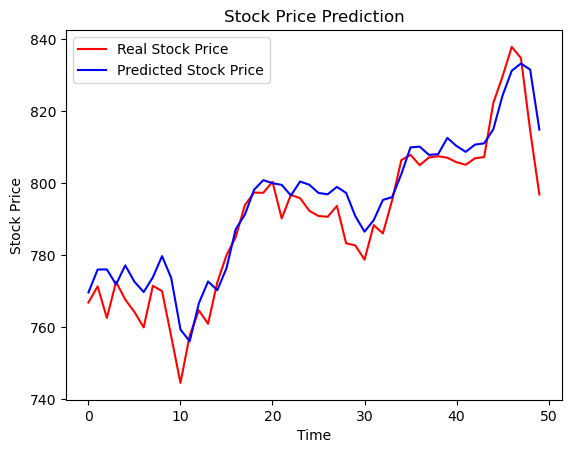

[[766.92 772.7  764.23]
 [771.37 775.   760.  ]
 [762.61 769.7  760.6 ]
 [772.63 776.96 767.  ]
 [767.73 768.28 755.25]
 [764.26 765.   760.52]
 [760.   779.53 759.8 ]
 [771.53 778.5  768.24]
 [770.07 772.99 754.83]
 [757.44 759.85 737.03]
 [744.59 754.   743.1 ]
 [757.71 763.9  752.9 ]
 [764.73 768.83 757.34]
 [761.   771.36 755.8 ]
 [772.48 778.18 767.23]
 [780.   789.43 779.02]
 [785.04 791.25 784.35]
 [793.9  804.38 793.34]
 [797.4  804.   794.01]
 [797.34 803.   792.92]
 [800.4  800.86 790.29]
 [790.22 797.66 786.27]
 [796.76 798.65 793.27]
 [795.84 796.68 787.1 ]
 [792.36 793.32 788.58]
 [790.9  792.74 787.28]
 [790.68 797.86 787.66]
 [793.7  794.23 783.2 ]
 [783.33 785.93 778.92]
 [782.75 782.78 770.41]
 [778.81 789.63 775.8 ]
 [788.36 791.34 783.16]
 [786.08 794.48 785.02]
 [795.26 807.9  792.2 ]
 [806.4  809.97 802.83]
 [807.86 809.13 803.51]
 [805.   808.15 801.37]
 [807.14 807.39 799.17]
 [807.48 811.22 806.69]
 [807.08 807.14 800.37]
 [805.81 806.21 800.99]
 [805.12 809.48 

2023-11-21 17:09:20.853764: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-21 17:09:21.210300: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-21 17:09:21.304280: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-21 17:09:21.389558: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-21 17:09:21.489578: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-21 17:09:21.645678: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-21 17:09:21.805408: I tensorflow/core/grappler/optimizers/cust

 1/37 [..............................] - ETA: 1:50 - loss: 0.3520

2023-11-21 17:09:22.131729: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


37/37 [==============================] - 5s 52ms/step - loss: 0.0340
Epoch 2/100
37/37 [==============================] - 1s 37ms/step - loss: 0.0037
Epoch 3/100
37/37 [==============================] - 1s 36ms/step - loss: 0.0017
Epoch 4/100
37/37 [==============================] - 1s 36ms/step - loss: 0.0012
Epoch 5/100
37/37 [==============================] - 1s 36ms/step - loss: 0.0010
Epoch 6/100
37/37 [==============================] - 1s 36ms/step - loss: 9.1058e-04
Epoch 7/100
37/37 [==============================] - 1s 36ms/step - loss: 8.5085e-04
Epoch 8/100
37/37 [==============================] - 1s 36ms/step - loss: 7.7607e-04
Epoch 9/100
37/37 [==============================] - 1s 36ms/step - loss: 9.3257e-04
Epoch 10/100
37/37 [==============================] - 1s 37ms/step - loss: 7.2289e-04
Epoch 11/100
37/37 [==============================] - 1s 36ms/step - loss: 6.7943e-04
Epoch 12/100
37/37 [==============================] - 1s 35ms/step - loss: 7.5704e-04
Epoch 13/

2023-11-21 17:11:32.654528: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-21 17:11:32.824855: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-21 17:11:32.907469: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-21 17:11:32.980708: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-21 17:11:33.049126: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 84ms/step


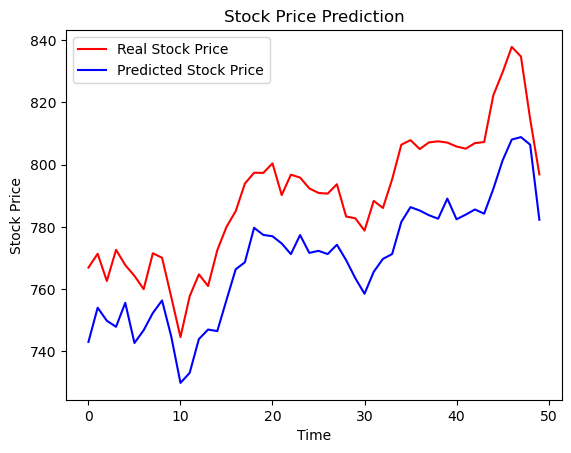

Temps d'exécution LSTM :  144.64029717445374
Différence moyenne entre les deux listes LSTM :  [ -4.42185624   0.37554376 -10.15645624]
Temps d'exécution GRU :  134.47712588310242
Différence moyenne entre les deux listes GRU :  [20.24365705 25.04105705 14.50905705]


In [13]:
import time

start_time_LSTM = time.time() 
real_stock_price_LSTM, predicted_stock_price_LSTM = rnn_LSTM()  
end_time_LSTM = time.time() 

print(real_stock_price_LSTM)

start_time_GRU = time.time()
real_stock_price_GRU, predicted_stock_price_GRU = rnn_GRU()
end_time_GRU = time.time()

print("Temps d'exécution LSTM : ", end_time_LSTM - start_time_LSTM)
print("Différence moyenne entre les deux listes LSTM : ",
      diff_moyenne(real_stock_price_LSTM, predicted_stock_price_LSTM))
print("Aire entre les deux courbes LSTM : ", aire(real_stock_price_LSTM[:, 0], predicted_stock_price_LSTM))
print("Temps d'exécution GRU : ", end_time_GRU - start_time_GRU)
print("Différence moyenne entre les deux listes GRU : ", diff_moyenne(real_stock_price_GRU, predicted_stock_price_GRU))
print("Aire entre les deux courbes GRU : ", aire(real_stock_price_GRU[:, 0], predicted_stock_price_GRU))